In [1]:
import sys

sys.path.append("..")
import numpy as np
import analysis as an
from utils import load_video
import cv2

In [2]:
def color(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [3]:
END = 30

# Load plankton positions
pos = np.load("../data/plankton-detections-data/lodestar-detections-plankton2.npy", allow_pickle=True)
pos = pos[:END]
print(pos.shape)

# Load video
frames = load_video(
    "../data/plankton-videos/Plankton2.mp4",
    end=END,
)

(30,)


loading frames: 100%|██████████| 30/30 [00:02<00:00, 14.61it/s]


In [4]:
traj_data = an.get_trajectory_data(pos, minimum_length=10, props=None)

Linking particles: 100%|██████████| 30/30 [00:00<00:00, 108.19it/s]


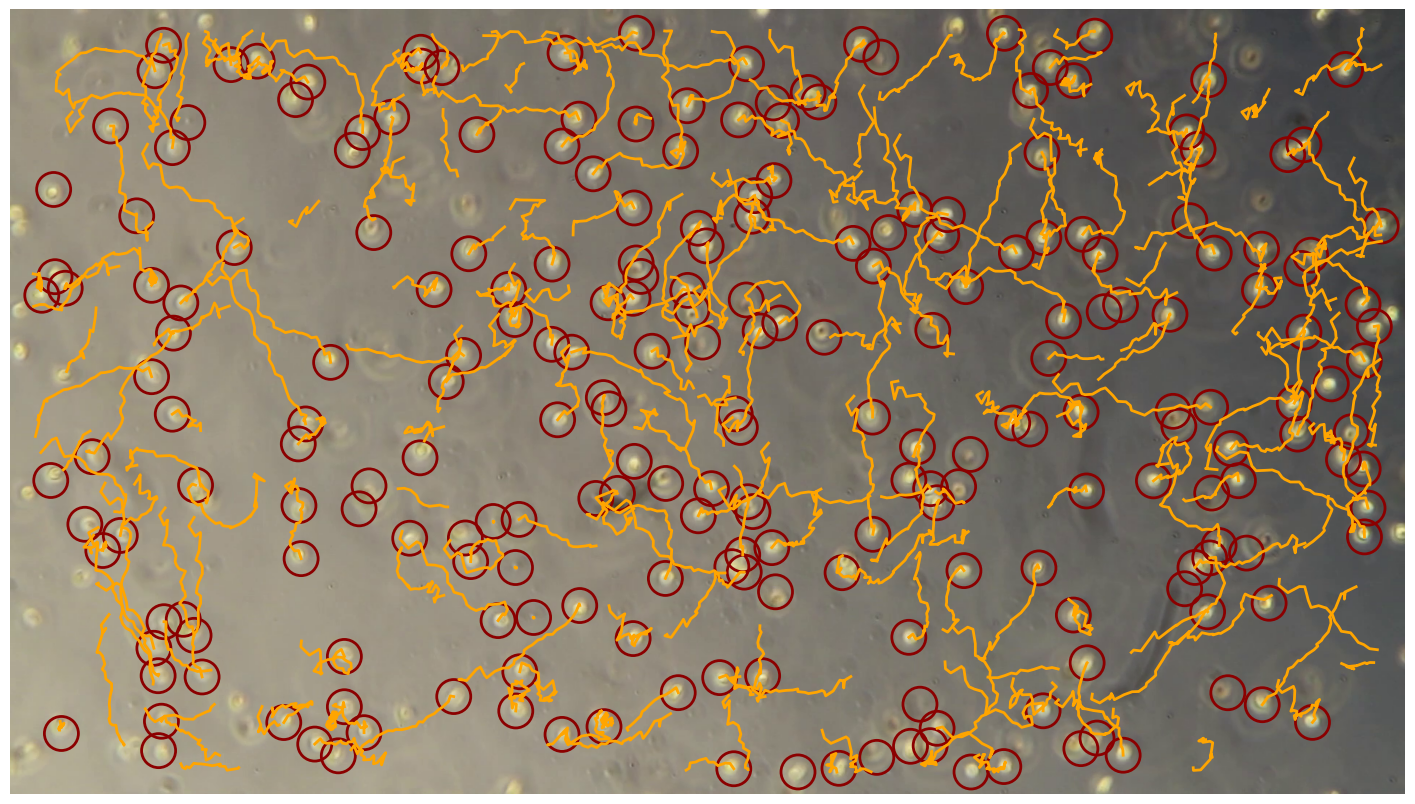

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(18, 12))
ax.imshow(color(frames[-1]), cmap="gray")
plt.axis("off")
plt.scatter(
    pos[-1][:, 1],
    pos[-1][:, 0],
    color="red",
    s=600,
    facecolors="none",
    edgecolors="darkred",
    linewidth=2,
)
i = 0
for trajectory in traj_data:
    ax.plot(trajectory[:, 2], trajectory[:, 1], "orange", alpha=1, linewidth=2)
    # ax.text(trajectory[:,2][-1], trajectory[:,1][-1], str(i), color="white", fontsize=16)
    i += 1

plt.show()